In [16]:
import numpy as np
import pandas as pd

In [17]:
data = pd.read_csv('diabetes_data.csv',sep=";")

In [18]:
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [20]:
data['class'].value_counts()

1    320
0    200
Name: class, dtype: int64

In [21]:
data.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
data.dropna(axis=0, subset=['class'], inplace=True)
y = data['class']
X = data.drop(['class'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

my_imputer = MinMaxScaler()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)
pickle.dump(my_imputer,open("scalar.sav","wb"))

In [34]:
feature_names = [x for x in X.columns] 
feature_names

['age',
 'polyuria',
 'polydipsia',
 'sudden_weight_loss',
 'weakness',
 'polyphagia',
 'genital_thrush',
 'visual_blurring',
 'itching',
 'irritability',
 'delayed_healing',
 'partial_paresis',
 'muscle_stiffness',
 'alopecia',
 'obesity']

In [35]:
!pip install xgboost


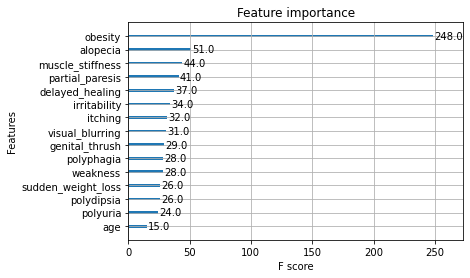

In [36]:
from xgboost import XGBRegressor,XGBClassifier, plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel
my_model = XGBClassifier()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)
plot_importance(my_model).set_yticklabels(feature_names)
pyplot.show()

In [37]:
predictions = my_model.predict(test_X)

In [38]:
from sklearn.metrics import classification_report
target_names = target_names = ['not_diabetes', 'diabetes']
print(classification_report(test_y, predictions, target_names=target_names))

              precision    recall  f1-score   support

not_diabetes       0.95      0.96      0.95        55
    diabetes       0.97      0.96      0.97        75

    accuracy                           0.96       130
   macro avg       0.96      0.96      0.96       130
weighted avg       0.96      0.96      0.96       130



In [41]:
import pickle
pickle.dump(my_model,open("model.sav","wb"))

In [42]:
import tensorflow as tf

In [43]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu",input_shape=(15,)),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [29]:
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [30]:
model_3.fit(train_X, train_y,validation_data=(test_X,test_y),epochs=150)

Epoch 1/150
13/13 [==============================] - 1s 23ms/step - loss: 0.6541 - accuracy: 0.6077 - val_loss: 0.6187 - val_accuracy: 0.6000
Epoch 2/150
13/13 [==============================] - 0s 8ms/step - loss: 0.5855 - accuracy: 0.6282 - val_loss: 0.5898 - val_accuracy: 0.5769
Epoch 3/150
13/13 [==============================] - 0s 7ms/step - loss: 0.5472 - accuracy: 0.6256 - val_loss: 0.5624 - val_accuracy: 0.5769
Epoch 4/150
13/13 [==============================] - 0s 7ms/step - loss: 0.5151 - accuracy: 0.6436 - val_loss: 0.5296 - val_accuracy: 0.6615
Epoch 5/150
13/13 [==============================] - 0s 7ms/step - loss: 0.4818 - accuracy: 0.7282 - val_loss: 0.4926 - val_accuracy: 0.6846
Epoch 6/150
13/13 [==============================] - 0s 7ms/step - loss: 0.4473 - accuracy: 0.7487 - val_loss: 0.4578 - val_accuracy: 0.7462
Epoch 7/150
13/13 [==============================] - 0s 7ms/step - loss: 0.4198 - accuracy: 0.7692 - val_loss: 0.4273 - val_accuracy: 0.7846
Epoch 8/150


Epoch 59/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0834 - accuracy: 0.9769 - val_loss: 0.1064 - val_accuracy: 0.9769
Epoch 60/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0827 - accuracy: 0.9744 - val_loss: 0.1012 - val_accuracy: 0.9769
Epoch 61/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0808 - accuracy: 0.9769 - val_loss: 0.0990 - val_accuracy: 0.9769
Epoch 62/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0800 - accuracy: 0.9769 - val_loss: 0.0984 - val_accuracy: 0.9769
Epoch 63/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0793 - accuracy: 0.9769 - val_loss: 0.0987 - val_accuracy: 0.9769
Epoch 64/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0781 - accuracy: 0.9795 - val_loss: 0.0930 - val_accuracy: 0.9769
Epoch 65/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0765 - accuracy: 0.9795 - val_loss: 0.0979 - val_accuracy: 0.9769
Epoch 

13/13 [==============================] - 0s 5ms/step - loss: 0.0417 - accuracy: 0.9872 - val_loss: 0.0884 - val_accuracy: 0.9769
Epoch 117/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0414 - accuracy: 0.9897 - val_loss: 0.0758 - val_accuracy: 0.9846
Epoch 118/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0408 - accuracy: 0.9897 - val_loss: 0.0843 - val_accuracy: 0.9769
Epoch 119/150
13/13 [==============================] - 0s 6ms/step - loss: 0.0406 - accuracy: 0.9897 - val_loss: 0.0856 - val_accuracy: 0.9769
Epoch 120/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0402 - accuracy: 0.9897 - val_loss: 0.0836 - val_accuracy: 0.9769
Epoch 121/150
13/13 [==============================] - 0s 8ms/step - loss: 0.0399 - accuracy: 0.9897 - val_loss: 0.0759 - val_accuracy: 0.9769
Epoch 122/150
13/13 [==============================] - 0s 7ms/step - loss: 0.0402 - accuracy: 0.9897 - val_loss: 0.0849 - val_accuracy: 0.9769
Epoch 123/150

In [31]:
model_3.save("model1.h5")

In [32]:
model_3.predict(test_X)
model_3.evaluate(test_X,test_y)

5/5 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.9769


[0.09666603058576584, 0.9769230484962463]